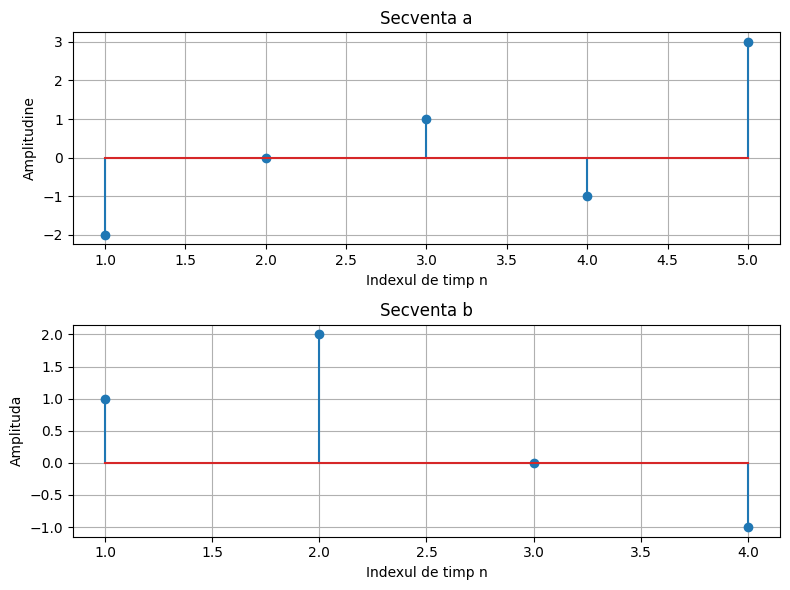

In [ ]:
#TASK 1

import numpy as np
import matplotlib.pyplot as plt

# Define the sequences
a = np.array([-2, 0, 1, -1, 3])
b = np.array([1, 2, 0, -1])

d = len(a)
c = len(b)

n = np.arange(1, d + 1)
l = np.arange(1, c + 1)

# Plot the sequences
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.stem(n, a)
plt.xlabel('Indexul de timp n')
plt.ylabel('Amplitudine')
plt.title('Secventa a')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(l, b)
plt.xlabel('Indexul de timp n')
plt.ylabel('Amplituda')
plt.title('Secventa b')
plt.grid()

plt.tight_layout()
plt.show()

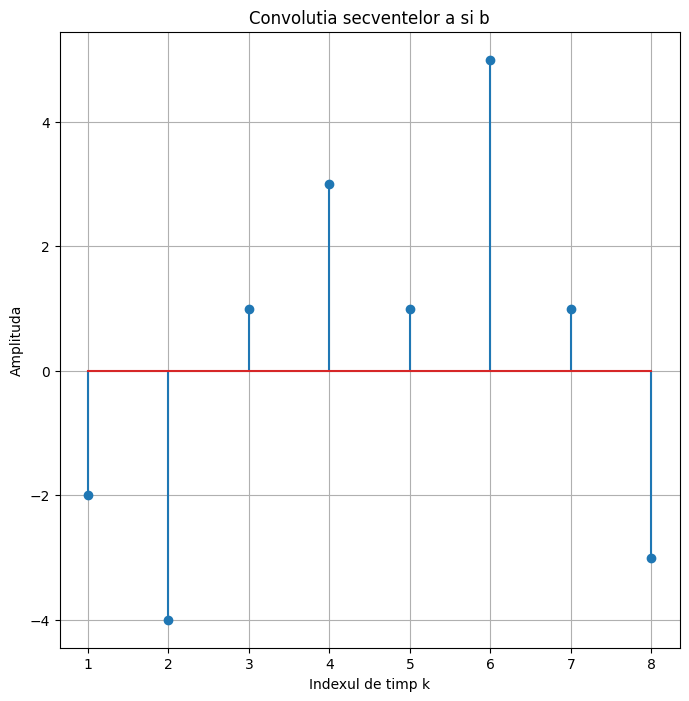

In [21]:
#TASK 2

# Compute convolution
conv_result = np.convolve(a, b)

# Define length of convolution result
m = d + c - 1
k = np.arange(1, m + 1)

# Plot the sequences
plt.figure(figsize=(8, 8))
plt.stem(k, conv_result)
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Convolutia secventelor a si b')
plt.grid()

plt.show()

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


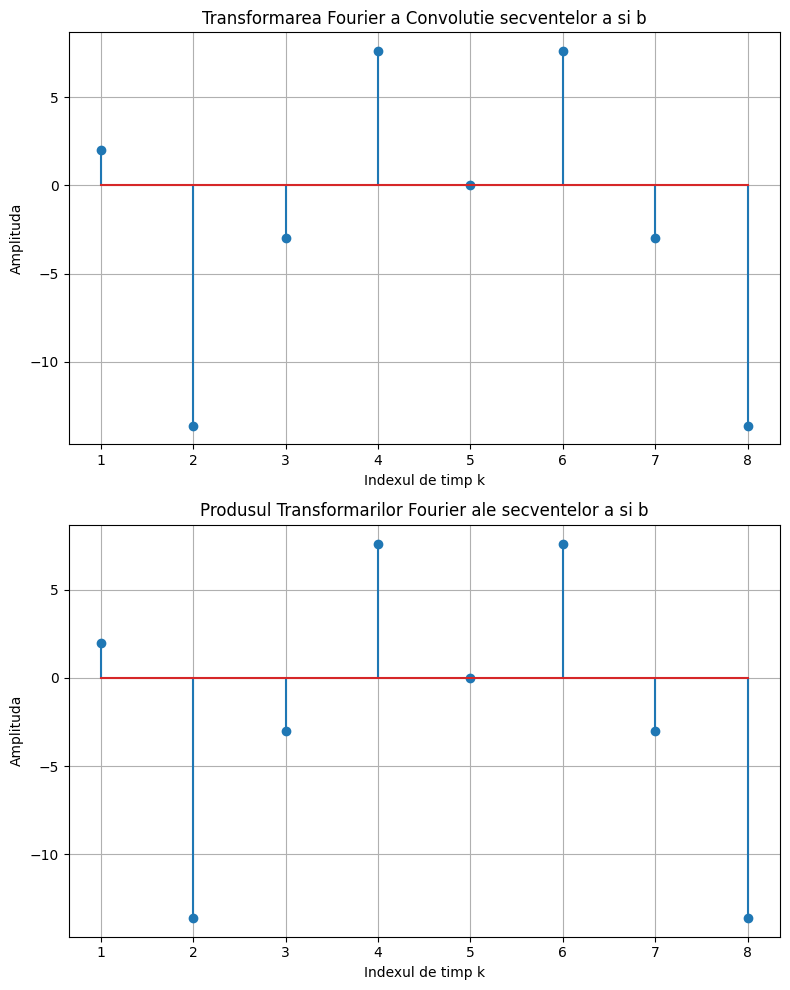

In [ ]:
#TASK 3

# Compute Fourier Transform of convolution result
conv_result_fft = np.fft.fft(conv_result, m)

# Compute Fourier Transform of sequences
AE = np.fft.fft(a, m)
BE = np.fft.fft(b, m)
p = AE * BE

# Plot the sequences
plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.stem(k, conv_result_fft)
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Transformarea Fourier a Convolutie secventelor a si b')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(k, np.real(p))
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Produsul Transformarilor Fourier ale secventelor a si b')
plt.grid()


plt.tight_layout()
plt.show()

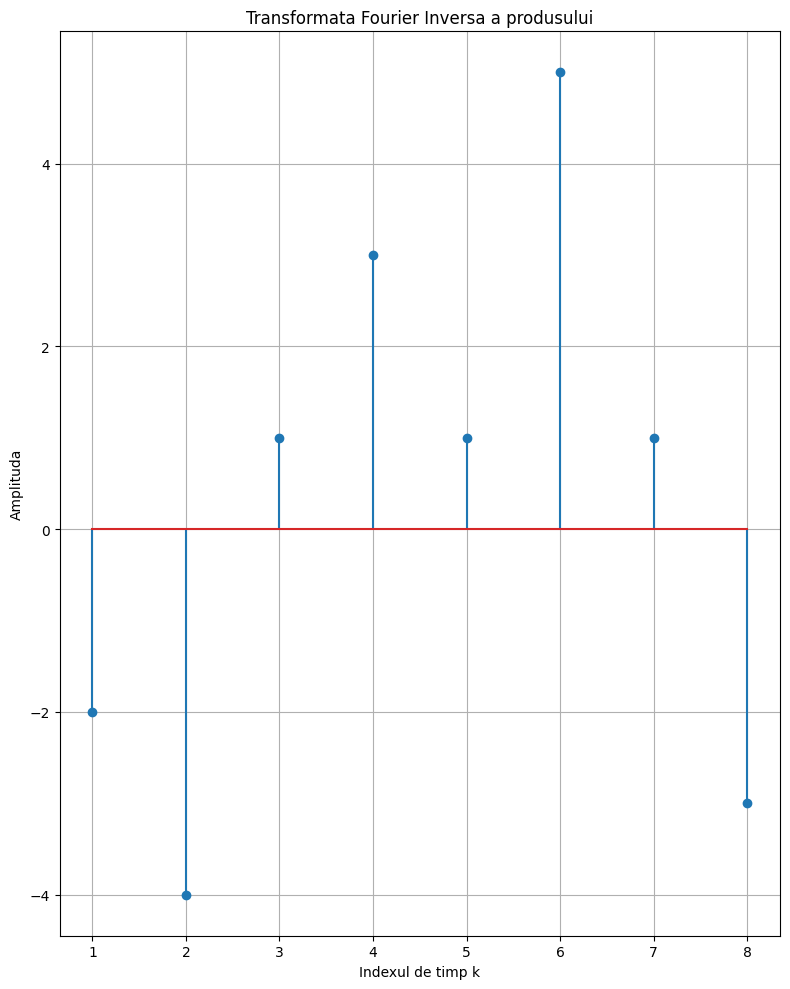

In [ ]:
#Task 4

# Compute inverse Fourier Transform to verify
ifft_result = np.fft.ifft(p)

# Plot the sequences
plt.figure(figsize=(8, 10))

plt.stem(k, np.real(ifft_result))
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Transformata Fourier Inversa a produsului')
plt.grid()

plt.tight_layout()
plt.show()

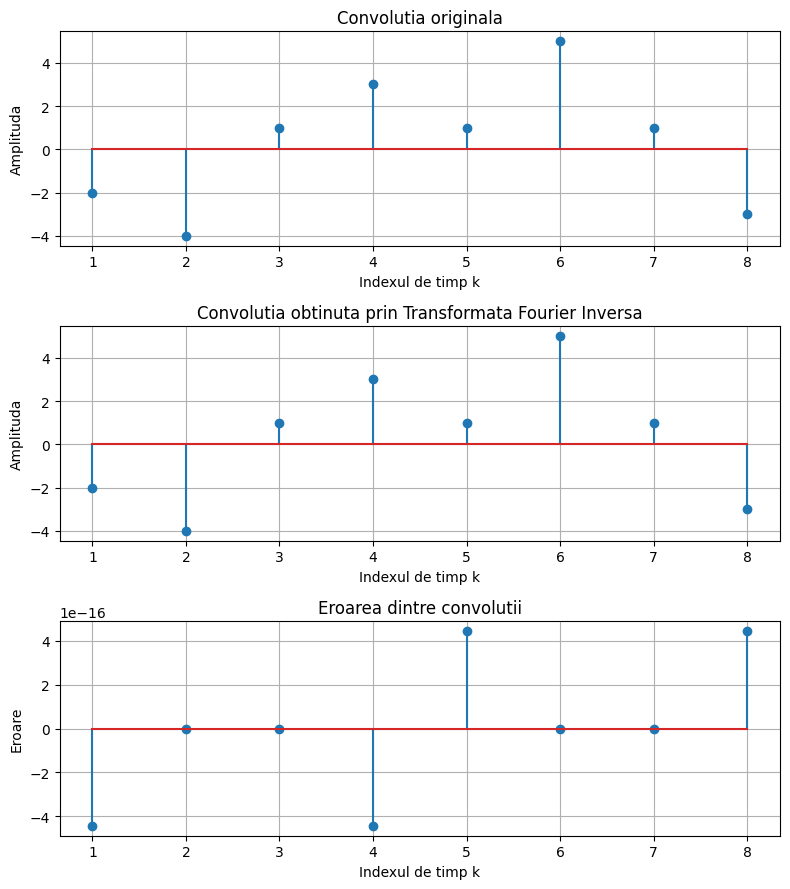

In [ ]:
#Task 5

# Compute error between convolution results
error = conv_result - np.real(ifft_result)

# Plot comparison of convolution results and error
plt.figure(figsize=(8, 9))

plt.subplot(3, 1, 1)
plt.stem(k, conv_result)
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Convolutia originala')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(k, np.real(ifft_result))
plt.xlabel('Indexul de timp k')
plt.ylabel('Amplituda')
plt.title('Convolutia obtinuta prin Transformata Fourier Inversa')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(k, error)
plt.xlabel('Indexul de timp k')
plt.ylabel('Eroare')
plt.title('Eroarea dintre convolutii')
plt.grid()

plt.tight_layout()
plt.show()